# Проект. Предсказание совершения покупки в интернет-магазине

Цель проекта: будем пытаться предсказать совершение покупки пользователем во время его сессии на сайте некоторого интернет-магазина.

Техническая задача: построить модель машинного обучения, которая на основе предложенных характеристик сессии на сайте будет предсказывать,совершит он покупку в интерент-магазине или нет.

Информация о наборе данных:

Набор данных состоит из векторов признаков, относящихся к 12 330 сеансам.
Набор данных был сформирован таким образом, чтобы каждый сеанс
принадлежал разным пользователям в течение года, чтобы избежать
какой-либо зависимости от конкретной кампании, особого дня,
профиля пользователя или периода.

Содержание
Набор данных состоит из 10 числовых и 8 категориальных атрибутов.
Атрибут «Доход» может использоваться в качестве метки класса.

«Административные», «Продолжительность административного», «Информационные», «Продолжительность информационного», «Связанные с продуктом» и «Продолжительность, связанная с продуктом» представляют собой количество различных типов страниц, посещённых посетителем за сеанс, и общее время, проведённое на каждой из этих категорий страниц. Значения этих характеристик определяются на основе URL-адресов страниц, посещённых пользователем, и обновляются в режиме реального времени при каждом действии пользователя, например, при переходе с одной страницы на другую. Показатели «Показатель отказов», «Показатель выходов» и «Ценность страницы» представляют собой метрики, измеряемые Google Analytics для каждой страницы сайта электронной коммерции. Значение показателя «Показатель отказов» для веб-страницы относится к проценту посетителей, которые переходят на сайт с этой страницы, а затем покидают её («отказ»), не инициируя никаких других запросов к серверу аналитики в течение данного сеанса. Значение показателя «Показатель выходов» для конкретной веб-страницы рассчитывается как процент последних просмотров страницы за сеанс. Атрибут «Значение страницы» представляет собой среднее значение для веб-страницы, которую пользователь посетил перед совершением транзакции электронной торговли. Атрибут «Особый день» указывает на близость времени посещения сайта к определённому особому дню (например, Дню матери, Дню святого Валентина), в который сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учётом динамики электронной торговли, такой как продолжительность между датой заказа и датой доставки. Например, для Дня святого Валентина это значение принимает ненулевое значение в период с 2 по 12 февраля, нулевое значение до и после этой даты, если только она не близка к другому особому дню, и максимальное значение 1 8 февраля. Набор данных также включает операционную систему, браузер, регион, тип трафика, тип посетителя (повторяющийся или новый), логическое значение, указывающее, является ли дата посещения выходным днём, и месяц года

In [1]:

import warnings # для игнорирования предупреждений
#Игнорируем варнинги
warnings.filterwarnings('ignore')

import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn.metrics import roc_auc_score, roc_curve
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

## 1. Первичная обработка данных

In [2]:
shoppers_data = pd.read_csv('data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(shoppers_data.shape)

(12330, 18)


Заранее удостоверимся в отсутствии пропусков:

In [4]:
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Теперь закодируем категориальные признаки с помощью простого горячего кодирования, используя уже знакомую нам функцию get_dummies():

In [6]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [7]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

## 2. Разведывательный анализ данных (EDA)

Теперь, когда необходимые преобразования выполнены, мы можем говорить о построении модели.

Итак, нам необходимо предсказать целевую переменную Revenue — признак покупки. Целевой признак является бинарным категориальным, то есть мы решаем задачу бинарной классификации. В первую очередь посмотрим на соотношение классов в данных:

Sessions without purchase : 84.53%
Sessions with purchase: 15.47%


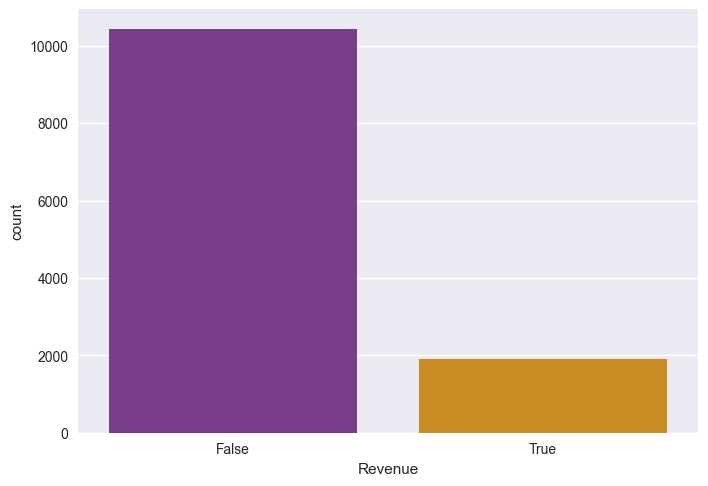

In [8]:
sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))

Из 12 330 сессий покупкой товара завершаются лишь 15.47 %. Мы знаем, что такое соотношение классов заставляет нас смотреть на метрики для каждого из классов отдельно.

Условимся, что лучшей будет считаться та модель, у которой значение метрики  для пользователей, совершивших покупку, будет наибольшим.

По традиции разделим набор данных на матрицу наблюдений X и вектор ответов y.

Нужно заранее определиться, как будем производить контроль качества наших моделей.
Разделим выборку на тренировочную и тестовую.
Будем проводить кросс-валидацию на тренировочной выборке (то есть будем делить её на тренировочные и валидационные фолды и считать среднее значение метрики по фолдам).
Итого мы будем использовать три показателя:
значение метрики на тренировочных и валидационных фолдах кросс-валидации (по ним мы будем отслеживать переобучение модели и подбирать внешние параметры);
значение метрики на отложенной тестовой выборке (оно будет нашим контрольным показателем).
Другими словами, мы будем сочетать hold-оut- и k-fold-подходы к валидации.

In [9]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']


Для начала позаботимся о создании отложенной тестовой выборки.

Разделите выборку на тренировочную и тестовую в соотношении 80/20. Используйте разбиение, стратифицированное по целевому признаку. В качестве значения параметра random_state возьмите число 42.

Чему равно количество сессий на сайте в тренировочной и тестовой выборках?

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print('Train:', X_train.shape[0], '\n', y_train.value_counts(normalize=True), sep='')
print('Test:', X_test.shape[0], '\n', y_test.value_counts(normalize=True), sep='')


Train:9864
Revenue
False    0.845296
True     0.154704
Name: proportion, dtype: float64
Test:2466
Revenue
False    0.845093
True     0.154907
Name: proportion, dtype: float64


## 3. Построение модели случайного леса, кросс-валидация

В качестве модели будем использовать случайный лес (Random Forest) для решения данной задачи. 

Создадим модель случайного леса. В качестве значения параметра random_state возьмите число 42. Остальные параметры оставим по умолчанию.

Оценим качество такой модели с помощью кросс-валидации по пяти фолдам. Так как классы несбалансированы, используем кросс-валидатор StratifiedKFold (перемешивать выборку не нужно).

Для проведения кросс-валидации используем функцию cross_validate(). Набор данных (параметры X, y) — тренировочная выборка (X_train, y_train). Метрика — F1-score.



In [11]:
#Создаём модель
rf_model = ensemble.RandomForestClassifier(
    #n_estimators=500, #число деревьев
    #criterion='entropy', #критерий эффективности
    #max_depth=3, #максимальная глубина дерева
    #max_features='sqrt', #число признаков из метода случайных подространств
    random_state=42 #генератор случайных чисел
)

# Создаем кросс-валидатор со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=rf_model, #модель
    X=X_train, #матрица наблюдений X
    y=y_train, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

test_score_mean = np.mean(cv_metrics['test_score'])
train_score_mean = np.mean(cv_metrics['train_score'])
print(f'test_score_mean: {test_score_mean.round(2)}')
print(f'train_score_mean: {train_score_mean.round(2)}')


{'fit_time': array([0.88166833, 0.84742904, 0.81495023, 0.84237194, 0.83412361]),
 'score_time': array([0.0156312 , 0.03125834, 0.03124452, 0.01523733, 0.03214908]),
 'test_score': array([0.64540338, 0.67636364, 0.65497076, 0.61904762, 0.65441176]),
 'train_score': array([1.        , 0.99959033, 1.        , 1.        , 1.        ])}

test_score_mean: 0.65
train_score_mean: 1.0


## 4. Построение кривых обучения


Попробуем использовать несколько вариаций случайного леса и с помощью кривых обучения постараемся выбрать наилучшую из них.

Создадим список из трёх следующих моделей:

Случайный лес из деревьев максимальной глубины 5.
Случайный лес из деревьев максимальной глубины 7.
Случайный лес из деревьев максимальной глубины 12.
Для всех трёх моделей количество деревьев в лесу (n_estimators) возьмите равным 200, количество объектов в листе (min_samples_leaf) — 5. Параметр random_state = 42. Остальные параметры оставьте по умолчанию.

Построим для каждой из моделей кривую обучения.

воспользуемся функцией plot_learning_curve(), которую мы создали в юните по кривым обучения.

Для построения кривых используем обучающий набор данных (X_train, y_train), стратифицированный кросс-валидатор на пяти фолдов (StratifiedKFold) и метрику -score. Остальные параметры функции learning_curve() оставим по умолчанию.

In [12]:
models = [
    ensemble.RandomForestClassifier(
    n_estimators=200, #число деревьев
    max_depth=5, #максимальная глубина дерева
    min_samples_leaf=5,
    random_state=42 #генератор случайных чисел
),
    ensemble.RandomForestClassifier(
    n_estimators=200, #число деревьев
    max_depth=7, #максимальная глубина дерева
    min_samples_leaf=5,
    random_state=42 #генератор случайных чисел
),
    ensemble.RandomForestClassifier(
    n_estimators=200, #число деревьев
    max_depth=12, #максимальная глубина дерева
    min_samples_leaf=5,
    random_state=42 #генератор случайных чисел
)
]

In [13]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

KeyboardInterrupt: 

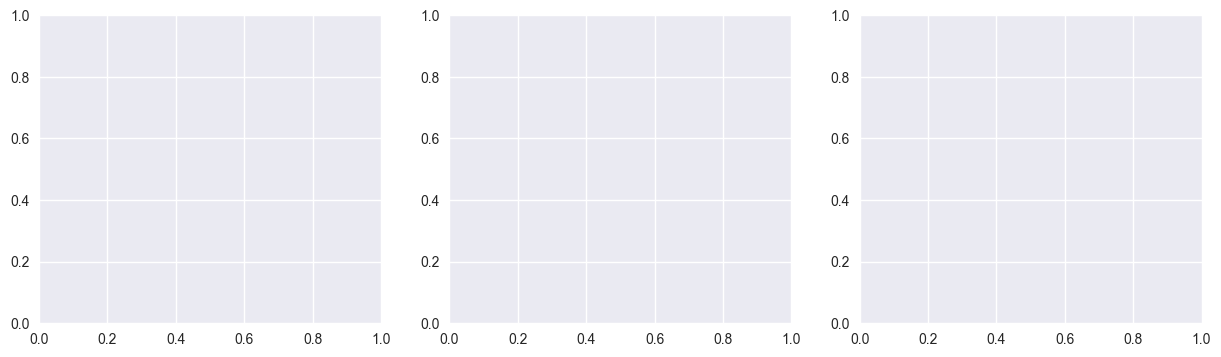

In [14]:
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X_train, y_train, 
        skf, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()'
)

**Можно чуть по-другому решить это**: т.к. параметры моделей абсолюьтно одинаковые, кроме грубины дерева, можно сделать вот так:

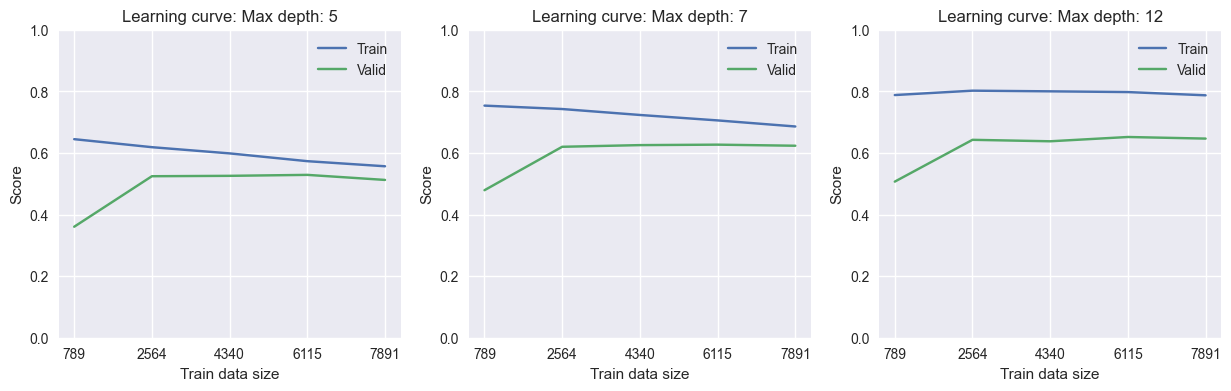

In [ ]:
#Список из глубин деревьев
depths = [5, 7, 12]
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + три координатных плоскости
#Создаём цикл по списку глубин и индексам этого списка
for i, depth in enumerate(depths): #i-текущий индекс, depth — текущая глубина
    #Создаём модель
    model = ensemble.RandomForestClassifier(
        n_estimators=200,
        max_depth=depth,
        min_samples_leaf=5,
        random_state=42
    )
    #Строим кривую обучению
    plot_learning_curve(model, X_train, y_train, skf, ax=axes[i], title=f'Max depth: {depth}')

Благодаря построенным графикам мы можем легко сравнить три представленные модели между собой. 

* Первый график построен для модели c максимальной глубиной дерева 5. Тренировочная и валидационная кривые постепенно сходятся к единой отметке качества, но результат низкий.
* Третий график построен для модели c максимальной глубиной дерева 12 указывает на наличие переобучения: тренировочная кривая находится на высоком уроывне, а вот валидационная кривая не может достичь такой высокой отметки.
* Из всех представленных оптимальной является модель дерева решений с ограничениями, кривая обучения которой изображена на втором графике. Тренировочная и валидационная кривые постепенно сходятся к единой отметке качества, и полученная метрика превышает отметку в 0.5.

## 5. Обучение модели на лучших параметрах


Обучим случайный лес с выбранной в предыдущем задании оптимальной глубиной на тренировочной выборке. Сделаем предсказание меток классов и выведите отчёт о метриках классификации.

In [ ]:
#Выбираем оптимальную модель
opt_model = models[1]
# обучаем
opt_model.fit(X_train,y_train)
#Делаем предсказания
y_pred_test = opt_model.predict(X_test)
#Выводим отчёт о метриках
print(metrics.classification_report(y_test, y_pred_test))

y_pred_proba = opt_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"optimal model - AUC: {auc:.4f}, GINI: {gini:.4f}")

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466

optimal model - AUC: 0.9179, GINI: 0.8358


**Вывод**: Модель хорошо определяет всех посетителей, которые завершат сессию без покупки, а вот качество распознавания пользователей, совершивших покупку, значительно ниже. Но мертика AUC показывает хорошие результаты, почти 92 процента, то то в 92% случаев модель присвоит покупателю более высокую вероятность, чем непокупателю.

## 6. Подбор порога вероятности с помощью PR-кривой.


Попробуем повысить качество распознавания посетителей, совершивших покупку. Используем метод подбора порога вероятности с помощью PR-кривой.

Порог вероятности будем подбирать с помощью кросс-валидации.

Сделаем предсказание вероятностей принадлежности к пользователям, которые совершат покупку, на кросс-валидации на пяти фолдах. Используем метод cross_val_predict().

Для кросс-валидации используйем случайный лес с подобранной в задании 6.5 оптимальной максимальной глубиной деревьев, набор данных (параметры X, y) — тренировочная выборка (X_train, y_train).

Постройим PR-кривую и отметьте на ней точку, в которой наблюдается максимум метрики  для посетителей, которые совершат покупку. Определите порог вероятности, соответствующий этой точке.

Best threshold = 0.35, F1-Score = 0.69


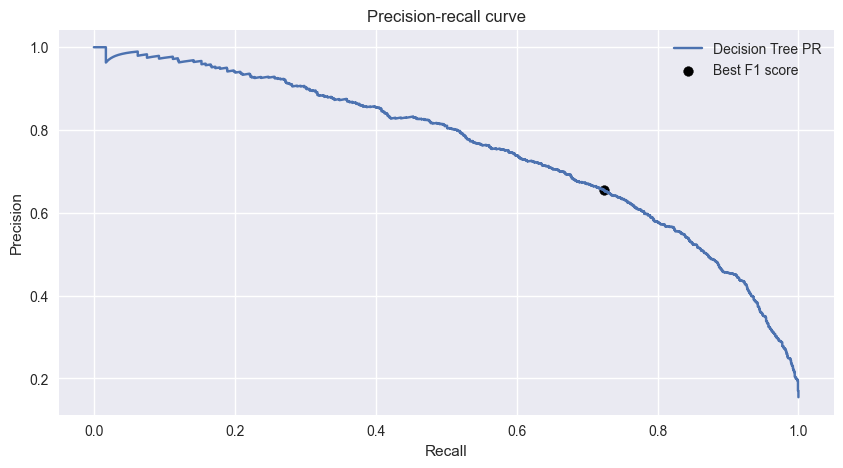

In [ ]:
#Создаём модель
opt_model = models[1]
#Обучаем модель
opt_model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')

#Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]

#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

#Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [ ]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.35
# Клиенты, для которых вероятность купить что-то > threshold_opt, относим к классу 1
#В противном случае — к классу 0
y_valid_pred_proba = opt_model.predict_proba(X_test)[:, 1]
y_valid_pred = (y_valid_pred_proba > threshold_opt).astype('int')
#Считаем метрики
print(metrics.classification_report(y_test, y_valid_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.64      0.69      0.67       382

    accuracy                           0.89      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.90      0.89      0.89      2466



In [ ]:
from sklearn.metrics import precision_recall_curve, auc
pr_auc = auc(recall, precision)

print(f"PR-AUC: {pr_auc:.4f}")

PR-AUC: 0.7548


In [ ]:
auc = roc_auc_score(y_test, y_valid_pred_proba)
gini = 2 * auc - 1
print(f"optimal model - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
pr_auc = auc(recall, precision)

print(f"PR-AUC: {pr_auc:.4f}")

optimal model - AUC: 0.9179, GINI: 0.8358
PR-AUC: 0.7548



## **Вывод:**
Отличный результат. 
* **Recall**   
Подобрав оптимальный порог вероятности мы смогли повысить recall  с 0.49 до до 0.69 для пользователей, которые совершат покупку. О чем это говорит? Мы увеличили охват, т.е. из всех пользователей, совершивших покупку, модель верно определяет 69%. Это ниже, чем этот показатель для пользователей, не совершивших покупку, но и выборка несбалансирована (85% False против 15% True). Модели "выгоднее" с точки зрения общей точности (accuracy) предсказать более частый класс (False), чем рисковать и ошибиться с редким классом (True). В результате модель жертвует Recall в пользу Precision. 
* **Precision**   
Но сдвинув порог вероятности отнесения к Тrue мы повысили охват. Да, точность снизилась с 0.79 до 0.64, но это закономерный процесс. Стало больше значений, из которых нужно выбирать True Positive.
* **F1-score**   
 F1-score вырос с 0.60 до 0.67 Это подтверждает, что баланс между Precision и Recall стал значительно лучше. Модель стала более сбалансированной и эффективной.
 Раньше: Модель пропускала 51% покупателей, но мы были очень уверены в тех, кого находили
Теперь: Пропускаем только 31% покупателей, при этом все еще достаточно точно определяем потенциальных клиентов
Для маркетинговых кампаний это означает:
  * Мы охватываем на 40% больше реальных покупателей [(69-49)/49]
  * При этом из каждых 100 пользователей, которых модель определит как совершивших покупку, 64 действительно совершат покупку.
* **PR-AUC** = 0.75 означает, что ваша модель в среднем на 75% эффективна в обнаружении покупателей по сравнению с идеальной моделью, и в 5 раз лучше случайного угадывания (0.75 vs 0.15).
* **AUC-ROC** = 0.9179 означает, что если взять случайного покупателя и случайного непокупателя, то в 91.79% случаев модель присвоит покупателю более высокую вероятность, чем непокупателю.